<a href="https://colab.research.google.com/github/Divyanshi-negi/Parkinson/blob/main/Parkinson_Disease_Prediction_using_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil


CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'parkinsons-data-set:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F409297%2F783889%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240826%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240826T062806Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1df62dce57bf1719523eb371a78663d0cf7bf72365ec49cac779b8e8cc8d5a9f3d467de857fd8605d29847e888a48de0346206876d063f94d2ab9a1bdc208f00a4fd02cb90439742f2d1c38a91875ec02a9db91a7edee41b130d898f1ee670724e6344253b5073a37b0eb4fbde5cc0f1f25f82378c1ca7cf9c1bf182de88a0930bae6badae5c5699225cb91318f43866ea3d4ec68ea5e03caaac53b191b3f752f79724045081be933f41723349d0106fd748f3dbf0e479038ad66cd036ca0e1beb9f5c083238d0ddd7138a17c3906bd24bc1333a8df184733f5e79160587273c7b629cb65c0dab6fb436f1bcf1c07a3bd7146a9c0bf11d1b23e004c1bb183cbf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 17517 bytes downloaded
Downloaded and uncompressed: parkinsons-data-set
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-data-set/parkinsons.data
/kaggle/input/parkinsons-data-set/parkinsons.names


##### import pandas as pd
import re
# Read the CSV file and display first 10 rows
df = pd.read_csv("/kaggle/input/parkinsons-data-set/parkinsons.data")
df.columns = [i.replace(" ", "_").replace("(%)", "_perc").replace("(dB)", "_db").replace(":", "_").lower() for i in df.columns]
df.columns = [re.sub(r"\((.+)\)", "", i) for i in df.columns]

df


In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv("/kaggle/input/parkinsons-data-set/parkinsons.data")
df.columns = [i.replace(" ", "_").replace("(%)", "_perc").replace("(dB)", "_db").replace(":", "_").lower() for i in df.columns]
df.columns = [re.sub(r"\((.+)\)", "", i) for i in df.columns]

df

,name,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.columns

Index(['name', 'mdvp_fo', 'mdvp_fhi', 'mdvp_flo', 'mdvp_jitter_perc',
       'mdvp_jitter', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe'],
      dtype='object')

In [ ]:
df.describe()

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
df_train = df.copy().drop(columns=["name"])
col_names = df_train.columns.tolist()
target_col = ["status"]
col_names.remove(target_col[0])
df_train = df_train[col_names + target_col]
std = StandardScaler()

scaled = std.fit_transform(df_train[col_names])     # Standardize the columns to get them on the same scale
scaled = pd.DataFrame(scaled, columns=col_names)

df_train = pd.concat([scaled, df_train[target_col]], axis=1)

df_train.head()

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


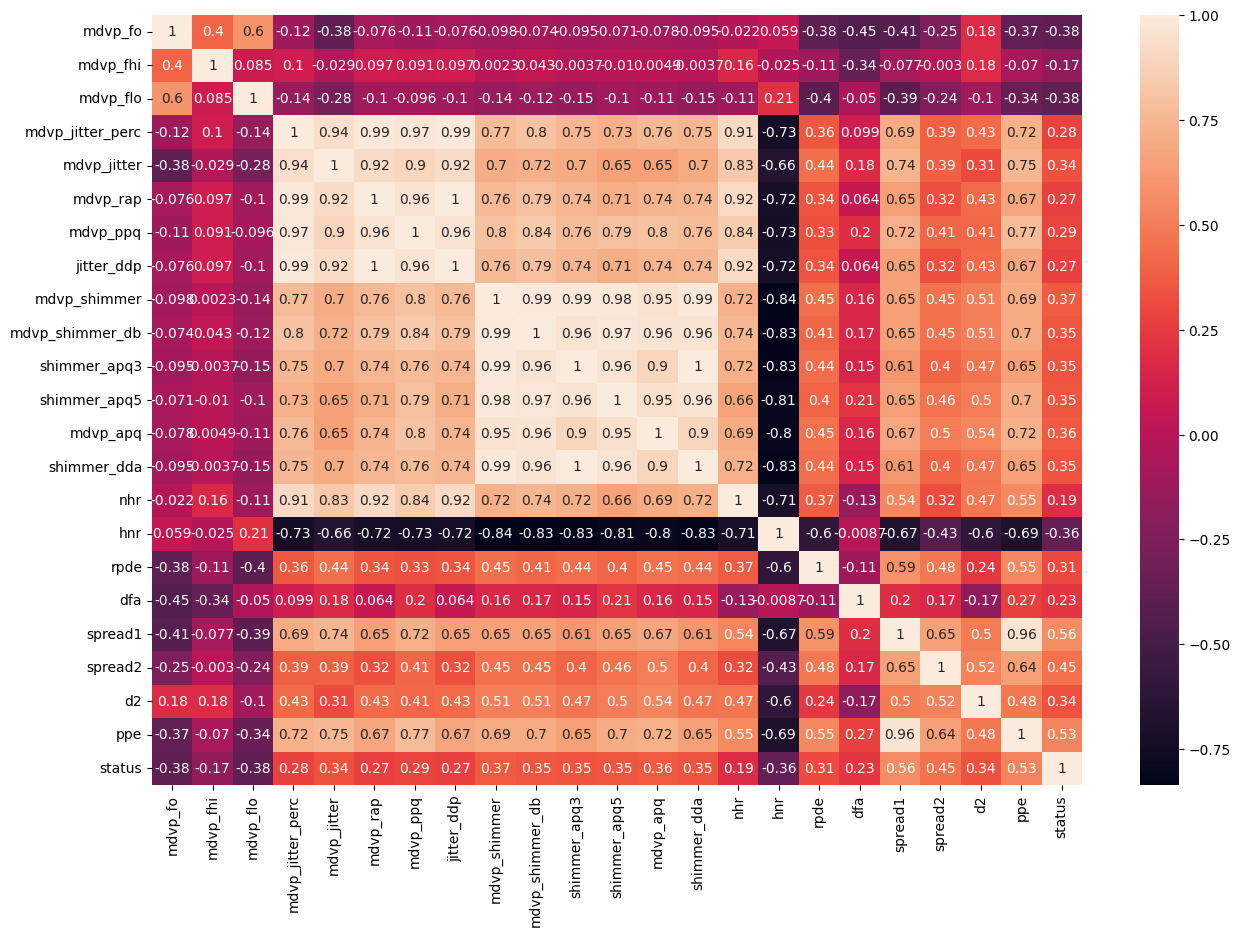

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
corr = df_train.corr()
sns.heatmap(corr, annot=True, fmt='.2g');

In [ ]:
X = df_train[col_names]      # Contains the independent columns
y = df_train[target_col]     # Our target column

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 323)
train_y = train_y["status"]
test_y = test_y["status"]

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

# Define the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(22,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with the correct optimizer parameter
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Alternatively, you can specify loss and metrics separately if needed
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Fit the model
history = model.fit(train_X,
                    train_y,
                    epochs=50,
                    batch_size=512,
                    validation_data=(test_X, test_y))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - binary_accuracy: 0.4191 - loss: 0.7908 - val_binary_accuracy: 0.4746 - val_loss: 0.7335
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - binary_accuracy: 0.4559 - loss: 0.7474 - val_binary_accuracy: 0.5254 - val_loss: 0.6988
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - binary_accuracy: 0.4853 - loss: 0.7211 - val_binary_accuracy: 0.5424 - val_loss: 0.6726
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - binary_accuracy: 0.5294 - loss: 0.7013 - val_binary_accuracy: 0.5763 - val_loss: 0.6508
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - binary_accuracy: 0.5809 - loss: 0.6847 - val_binary_accuracy: 0.5932 - val_loss: 0.6326
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - binary_accuracy: 0.6250 - loss: 0.6703 - val_binary_accuracy: 0.6441 - val_loss: 0.6161
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - binary_accuracy: 0.6250 - loss: 0.6577 - val_binary_accuracy: 0.6780 - val_loss: 0.6014
Epoch 8/50
1/1 ━━━━━━━━━━━━━━

In [ ]:

history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

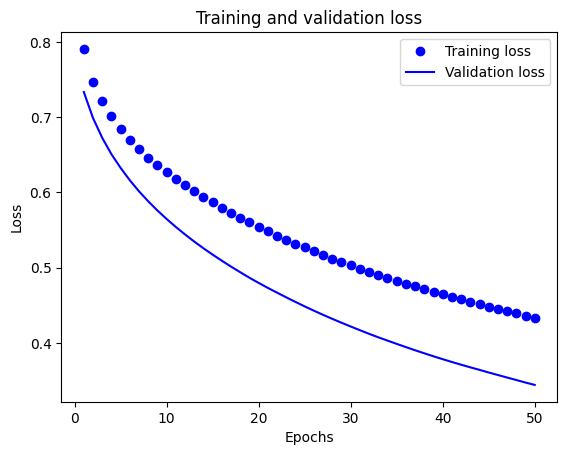

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

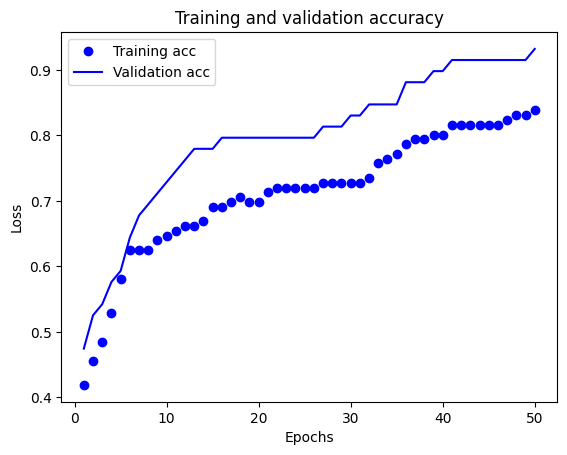

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

from sklearn import metrics
pred = model.predict(test_X)

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Mean Absolute Error: 0.27007825622114084
Mean Squared Error: 0.10264906650503203
Root Mean Squared Error: 0.32038893006006314


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
16     1
30     0
115    1
1      1
170    0
113    1
40     1
64     0
81     1
121    1
3      1
69     1
156    1
37     1
144    1
125    1
141    1
68     1
83     1
5      1
172    0
9      1
84     1
155    1
177    1
106    1
33     0
76     1
105    1
146    1
137    1
148    1
152    1
97     1
150    1
110    1
165    0
12     1
21     1
118    1
190    0
67     1
50     0
80     1
77     1
55     1
193    0
166    0
79     1
7      1
153    1
17     1
102    1
43     0
24     1
19     1
31     0
73     1
2      1
Name: status, dtype: int64


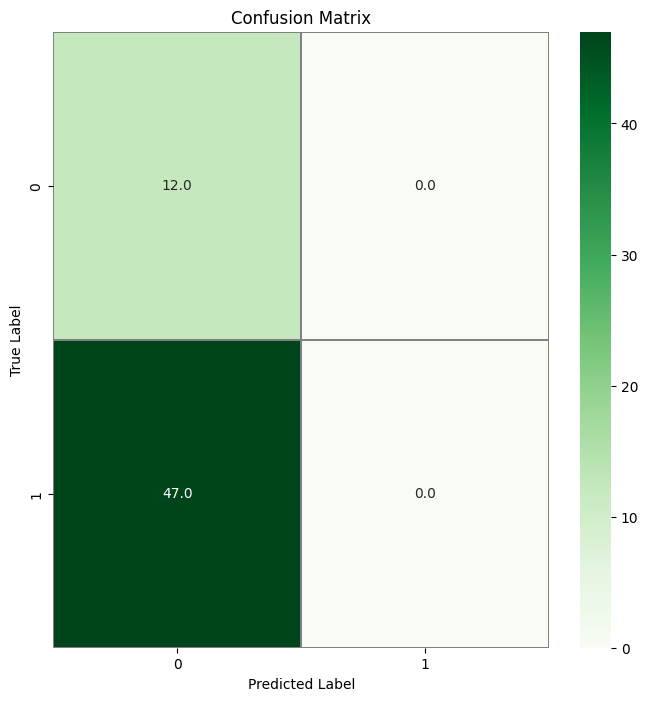

In [ ]:
from sklearn.metrics import confusion_matrix


import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)


# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
print(Y_pred_classes)
Y_true = test_y
print(Y_true)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(test_X)
Y_pred
# Convert predictions classes to one hot vectors
#Y_pred_classes = np.argmin(Y_pred,axis = 1)
#Y_pred_classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0.5757748 ],
       [0.2776716 ],
       [0.54171807],
       [0.9847256 ],
       [0.20805657],
       [0.501593  ],
       [0.4903292 ],
       [0.20588768],
       [0.83182746],
       [0.56046903],
       [0.9794618 ],
       [0.81060135],
       [0.7585602 ],
       [0.5915479 ],
       [0.52570826],
       [0.589249  ],
       [0.7803971 ],
       [0.851819  ],
       [0.6202929 ],
       [0.96734303],
       [0.57998323],
       [0.82462823],
       [0.82652456],
       [0.7761212 ],
       [0.532662  ],
       [0.524774  ],
       [0.27122694],
       [0.78606665],
       [0.51847637],
       [0.99893314],
       [0.9242154 ],
       [0.9970764 ],
       [0.9997081 ],
       [0.9520564 ],
       [0.98996246],
       [0.54976726],
       [0.34888238],
       [0.51645416],
       [0.7353182 ],
       [0.5493431 ],
       [0.5295975 ],
       [0.72657335],
       [0.55779076],
       [0.9485139 ],
       [0.71198046],
       [0.89774364],
       [0.3472999 ],
       [0.201

In [ ]:
confusion_matrix(test_y, Y_pred_classes)

array([[12,  0],
       [47,  0]])

In [ ]:
#https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(22,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

models=model.fit(train_X, train_y, epochs=100, batch_size=512)
results = model.evaluate(test_X, test_y)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7353 - loss: 0.6624
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7353 - loss: 0.6469
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7353 - loss: 0.6353
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7353 - loss: 0.6249
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7353 - loss: 0.6150
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7353 - loss: 0.6051
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7353 - loss: 0.5957
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7353 - loss: 0.5866
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7353 - loss: 0.5781
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7353 - loss: 0.5698
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7353 - loss: 0.5617
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7353 - loss: 0.5537
Epo

In [ ]:
results

[0.38153076171875, 0.8474576473236084]

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,492 (13.64 KB)

 Trainable params: 1,745 (6.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,747 (6.83 KB)

In [ ]:

pred=model.predict(test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [ ]:
pred

array([[0.35760263],
       [0.29077378],
       [0.37438452],
       [1.        ],
       [0.37515998],
       [0.9292152 ],
       [0.9462265 ],
       [0.43506154],
       [0.99983025],
       [0.98404944],
       [1.        ],
       [1.        ],
       [0.9776281 ],
       [0.99034995],
       [0.87234545],
       [0.98323745],
       [1.        ],
       [1.        ],
       [0.3412569 ],
       [0.99999905],
       [0.22030015],
       [0.9997534 ],
       [1.        ],
       [0.9997628 ],
       [0.90892524],
       [0.6894964 ],
       [0.27222422],
       [0.9999718 ],
       [0.2823574 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999777 ],
       [0.9999992 ],
       [0.99447495],
       [0.7856592 ],
       [0.49505192],
       [0.9999994 ],
       [0.92133147],
       [0.99972874],
       [0.9997669 ],
       [0.26657787],
       [0.999986  ],
       [0.4564302 ],
       [0.99984425],
       [0.373102  ],
       [0.355

In [ ]:
rf_predictions = model.predict(train_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
rf_predictions

array([[0.35660672],
       [0.9601827 ],
       [0.999892  ],
       [0.27478957],
       [0.92672914],
       [0.9989979 ],
       [0.9933065 ],
       [0.34101003],
       [0.4535305 ],
       [0.96114427],
       [0.40952095],
       [0.99999934],
       [0.8622004 ],
       [0.30007243],
       [1.        ],
       [0.77801883],
       [1.        ],
       [0.35902172],
       [0.9994993 ],
       [0.9997751 ],
       [0.88378775],
       [0.9999999 ],
       [0.96238416],
       [0.9999993 ],
       [1.        ],
       [0.96957463],
       [1.        ],
       [0.99999046],
       [0.72037   ],
       [0.2718066 ],
       [0.7221795 ],
       [0.91010934],
       [0.98031175],
       [0.9999795 ],
       [0.8349654 ],
       [0.9999998 ],
       [0.99999654],
       [0.9984494 ],
       [0.9990202 ],
       [0.9313864 ],
       [0.3261184 ],
       [0.41505903],
       [0.9999982 ],
       [0.9448526 ],
       [0.92781264],
       [0.35027942],
       [1.        ],
       [0.916

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

Mean Absolute Error: 0.18209020490363492
Mean Squared Error: 0.10078244682356695
Root Mean Squared Error: 0.3174625124696882


In [ ]:
from sklearn.linear_model import LogisticRegression

coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Features']
classifier = LogisticRegression()
coeff_df["Coefficient Estimate"] = pd.Series(classifier.fit(X, y).coef_[0])
#coeff_df["Coefficient Estimate"] = pd.Series(results.coef_[0])
coeff_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,Coefficient Estimate
0,mdvp_fo,-0.350892
1,mdvp_fhi,-0.242620
2,mdvp_flo,-0.093846
3,mdvp_jitter_perc,-0.558837
4,mdvp_jitter,-0.598829
5,mdvp_rap,0.580621
6,mdvp_ppq,-0.282240
7,jitter_ddp,0.580200
8,mdvp_shimmer,0.299542
9,mdvp_shimmer_db,0.265722


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
df=df.drop(['name'],axis=1)
x,y = df.loc[:,df.columns != 'status'], df.loc[:,'status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[10  9]
 [ 1 39]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



In [ ]:
preds=pred.tolist()
preds
test_y

,status
16,1
30,0
115,1
1,1
170,0
113,1
40,1
64,0
81,1
121,1


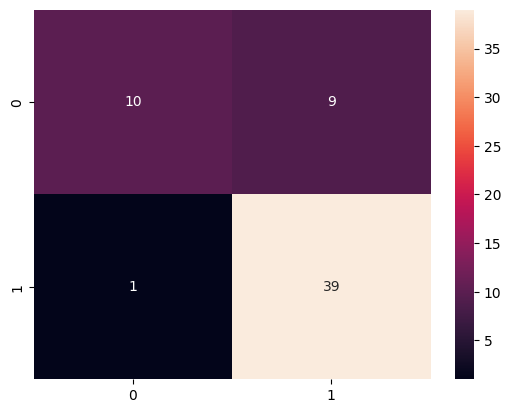

In [ ]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

# Predict probabilities for the test set
yhat_probs = model.predict(test_X, verbose=0)

# Convert predicted probabilities to class labels (threshold of 0.5 for binary classification)
yhat_classes = (yhat_probs > 0.5).astype("int32")

# Reduce probabilities to a 1D array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# Calculate metrics
# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, yhat_classes)
print('Accuracy: %f' % accuracy)

# Precision: tp / (tp + fp)
precision = precision_score(test_y, yhat_classes)
print('Precision: %f' % precision)

# Recall: tp / (tp + fn)
recall = recall_score(test_y, yhat_classes)
print('Recall: %f' % recall)

# F1 score: 2 * (precision * recall) / (precision + recall)
f1 = f1_score(test_y, yhat_classes)
print('F1 score: %f' % f1)

# Cohen's kappa
kappa = cohen_kappa_score(test_y, yhat_classes)
print('Cohen\'s kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(test_y, yhat_probs)
print('ROC AUC: %f' % auc)

# Confusion matrix
matrix = confusion_matrix(test_y, yhat_classes)
print(matrix)


Accuracy: 0.847458
Precision: 0.952381
Recall: 0.851064
F1 score: 0.898876
Cohen's kappa: 0.592479
ROC AUC: 0.902482
[[10  2]
 [ 7 40]]


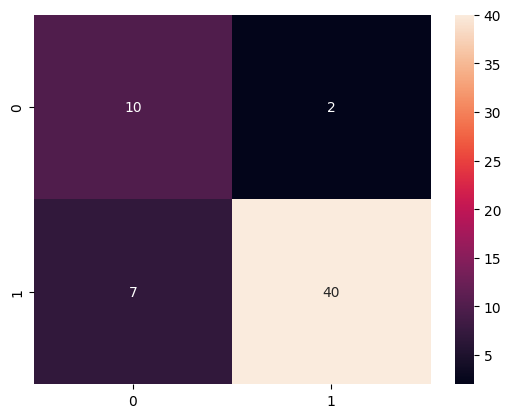

In [ ]:
sns.heatmap(matrix ,annot=True,fmt="d")
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis=1)
# Convert validation observations to one hot vectors
Y_pred_classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pred

array([[0.35760263],
       [0.29077378],
       [0.37438452],
       [1.        ],
       [0.37515998],
       [0.9292152 ],
       [0.9462265 ],
       [0.43506154],
       [0.99983025],
       [0.98404944],
       [1.        ],
       [1.        ],
       [0.9776281 ],
       [0.99034995],
       [0.87234545],
       [0.98323745],
       [1.        ],
       [1.        ],
       [0.3412569 ],
       [0.99999905],
       [0.22030015],
       [0.9997534 ],
       [1.        ],
       [0.9997628 ],
       [0.90892524],
       [0.6894964 ],
       [0.27222422],
       [0.9999718 ],
       [0.2823574 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999777 ],
       [0.9999992 ],
       [0.99447495],
       [0.7856592 ],
       [0.49505192],
       [0.9999994 ],
       [0.92133147],
       [0.99972874],
       [0.9997669 ],
       [0.26657787],
       [0.999986  ],
       [0.4564302 ],
       [0.99984425],
       [0.373102  ],
       [0.355

**from here this is https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data**
**data set , accuracy is 92 %**

In [ ]:
import pandas as pd

# Define the URL of the new dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

# Load the dataset into a DataFrame
df_new = pd.read_csv(url)

# Preview the dataset
print(df_new.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
# Import necessary libraries
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler

# Load the dataset from the UCI repository
df_new = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data")

# Standardize column names to match your current dataset
df_new.columns = [i.replace(" ", "_").replace("(%)", "_perc").replace("(dB)", "_db").replace(":", "_").lower() for i in df_new.columns]
df_new.columns = [re.sub(r"\((.+)\)", "", i) for i in df_new.columns]

# Drop any unwanted columns, such as 'name', since it's non-numeric
df_new = df_new.drop(columns=["name"])

# Define feature columns and target column
col_names_new = df_new.columns.tolist()
target_col_new = ["status"]
col_names_new.remove(target_col_new[0])

# Apply standardization to the feature columns
std_new = StandardScaler()
scaled_new = std_new.fit_transform(df_new[col_names_new])
scaled_new = pd.DataFrame(scaled_new, columns=col_names_new)

# Combine the scaled features with the target column
df_train_new = pd.concat([scaled_new, df_new[target_col_new]], axis=1)

# Preview the processed dataset
print(df_train_new.head())


    mdvp_fo  mdvp_fhi  mdvp_flo  mdvp_jitter_perc  mdvp_jitter  mdvp_rap  \
0 -0.829300 -0.436165 -0.952037          0.334914     0.749759  0.132963   
1 -0.770972 -0.530974 -0.057721          0.715418     1.037674  0.453892   
2 -0.909476 -0.723168 -0.109875          0.884991     1.325589  0.720770   
3 -0.909622 -0.649092 -0.114229          0.775389     1.325589  0.578885   
4 -0.925657 -0.606245 -0.130608          1.368893     1.901418  1.095750   

   mdvp_ppq  jitter_ddp  mdvp_shimmer  mdvp_shimmer_db  ...  shimmer_dda  \
0  0.760800    0.131755      0.745985         0.739536  ...     0.607532   
1  1.276809    0.452684      1.681731         1.768464  ...     1.548254   
2  1.585687    0.721813      1.202693         1.027636  ...     1.175323   
3  1.284076    0.577677      1.340396         1.207698  ...     1.340229   
4  2.047187    1.096793      1.836448         1.552389  ...     1.899461   

        nhr       hnr      rpde       dfa   spread1   spread2        d2  \
0 -0.067893

In [ ]:
# Import the required function
from sklearn.model_selection import train_test_split

# If you are using the new dataset directly (as in Option 2 from the previous answer)
df_combined = df_train_new  # Use the newly processed dataset directly

# Update the training and testing sets
X_combined = df_combined[col_names_new]   # Features
y_combined = df_combined[target_col_new]  # Target

# Split into training and testing datasets
train_X_combined, test_X_combined, train_y_combined, test_y_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=323)

# Extract the target column properly
train_y_combined = train_y_combined["status"]
test_y_combined = test_y_combined["status"]

# Proceed with the rest of your code...


In [ ]:
# Use the newly processed dataset directly
df_combined = df_train_new  # Use the newly processed dataset

# Update the training and testing sets
X_combined = df_combined[col_names_new]   # Features
y_combined = df_combined[target_col_new]  # Target

# Split into training and testing datasets
train_X_combined, test_X_combined, train_y_combined, test_y_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=323)

# Extract the target column properly
train_y_combined = train_y_combined["status"]
test_y_combined = test_y_combined["status"]

# Proceed with the rest of your code...


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=train_X_combined.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_combined = model.fit(train_X_combined, train_y_combined, epochs=50, batch_size=512, validation_data=(test_X_combined, test_y_combined))

# Evaluate the model
results_combined = model.evaluate(test_X_combined, test_y_combined)
print("Combined Dataset Results:", results_combined)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6544 - loss: 0.6420 - val_accuracy: 0.8644 - val_loss: 0.5513
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.7353 - loss: 0.5961 - val_accuracy: 0.9322 - val_loss: 0.5210
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7353 - loss: 0.5797 - val_accuracy: 0.9322 - val_loss: 0.4945
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7574 - loss: 0.5608 - val_accuracy: 0.8983 - val_loss: 0.4710
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7647 - loss: 0.5316 - val_accuracy: 0.8814 - val_loss: 0.4498
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7721 - loss: 0.5360 - val_accuracy: 0.8814 - val_loss: 0.4307
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7721 - loss: 0.5104 - val_accuracy: 0.8814 - val_loss: 0.4138
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8235 - loss: 0.4890 - val_accuracy: 0.8814 - val_loss: 0.

In [ ]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,797 (132.02 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,532 (88.02 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


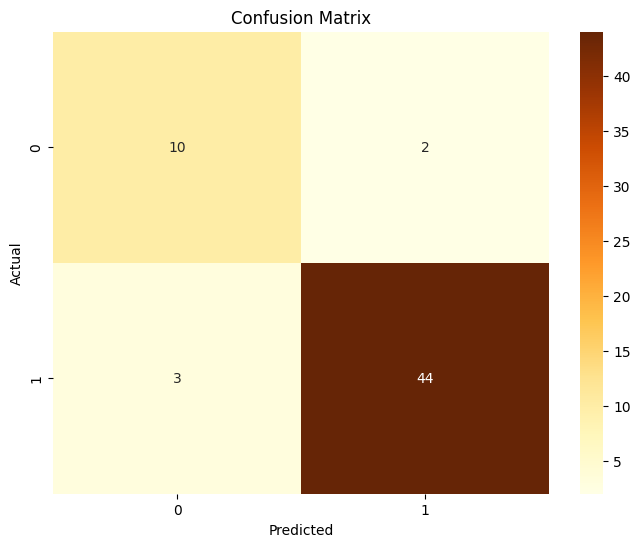

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred_combined = (model.predict(test_X_combined) > 0.5).astype("int32")

# Compute the confusion matrix
cm_combined = confusion_matrix(test_y_combined, y_pred_combined)

# Plot confusion matrix with yellow color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="YlOrBr")  # Using "YlOrBr" for a yellowish color
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(test_y_combined, y_pred_combined))


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.96      0.94      0.95        47

    accuracy                           0.92        59
   macro avg       0.86      0.88      0.87        59
weighted avg       0.92      0.92      0.92        59



Logistic Regression Accuracy: 0.9153


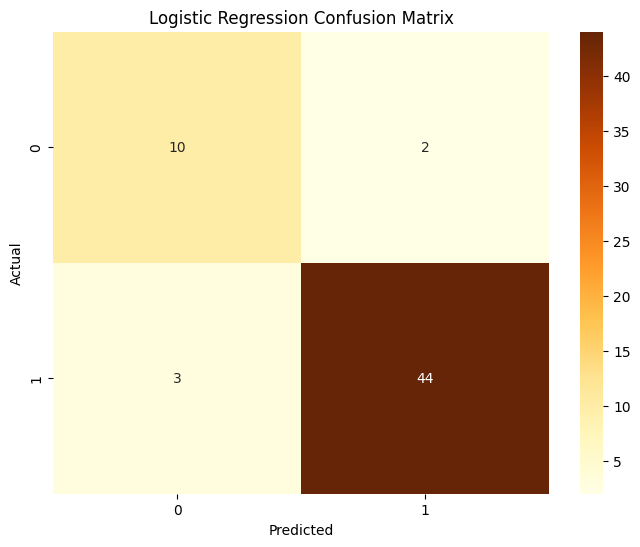

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.96      0.94      0.95        47

    accuracy                           0.92        59
   macro avg       0.86      0.88      0.87        59
weighted avg       0.92      0.92      0.92        59



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(train_X_combined, train_y_combined)

# Predict the labels for the test set
y_pred_logreg = log_reg_model.predict(test_X_combined)

# Evaluate the model
logreg_accuracy = accuracy_score(test_y_combined, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(test_y_combined, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="YlOrBr")
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print classification report for Logistic Regression
print(classification_report(test_y_combined, y_pred_logreg))


from pycaret.classification import *
clf1 = setup(data = df, target = 'status')